<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning

The intuition starting out can often be that supervised learning is more powerful and useful than unsupervised learning. It's worth bearing in mind that you often won't have access to sensibly labeled data and unsupervised learning gives you tools to help put sense around unstructured (or badly structured) data and to explore what your "unknown unknowns" in the data.

## Clustering

Sklearn provides several ways to cluster. We'll look at *k-means* , one of the most common approaches, here.

If you can cluster data and identify what the points in the cluster have in common then you can label your data.

It is fairly common to see clustering, and unsupervised methods in general, used as part of a larger pipeline:

1. Read in raw data (features)
2. Cluster data
3. Apply labels
4. Perform supervised learning

### k-Means Clustering

A *centroid* is a point (in feature space) representing the center of a cluster.

1. Pick the number of clusters you want, $k$
2. Intialize clusters
  - For each cluster place a centroid somewhere (there's a bunch of ways to choose where) in your data
3. Loop until the centroids no longer change position
  1. Assign observations (data points) to clusters. For each observation:
    1. Measure the distance to each centroid
    2. Assign the observation to the cluster for the closest centroid
  2. Update the centroids
    1. Calculate the mean for each cluster
    2. Assign the cluster centroid to the cluster mean.

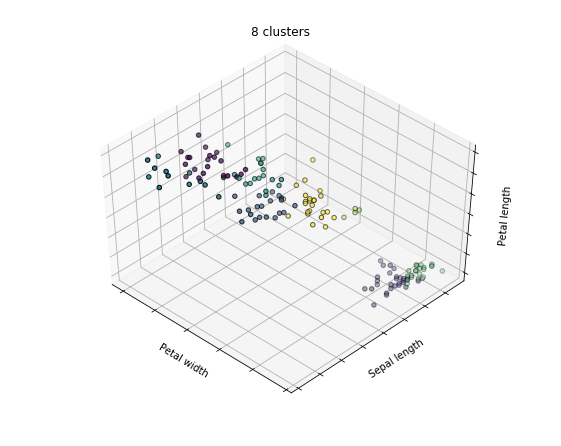

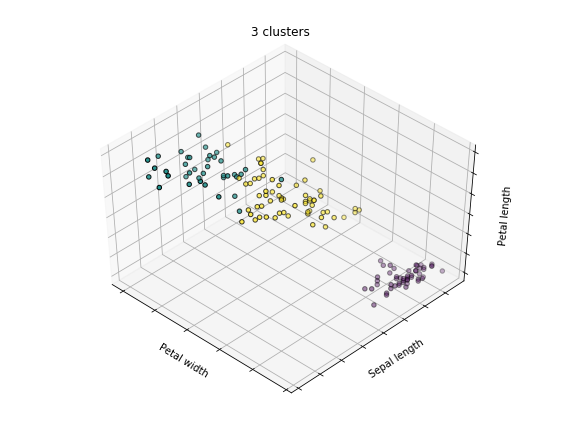

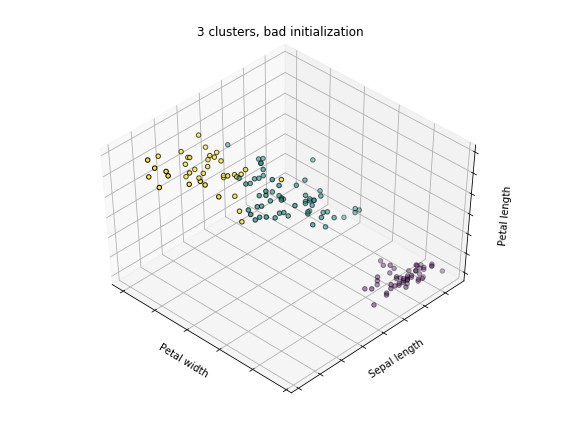

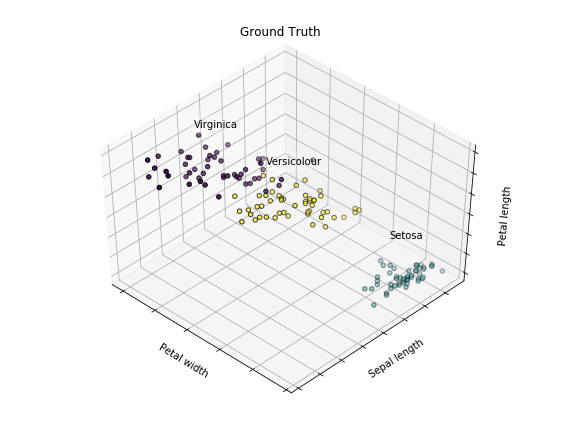

In [0]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()